In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsb

In [2]:
dt = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')
test_data = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

In [3]:
dt.head(7)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1


In [4]:
dt.shape


(64374, 12)

In [5]:
len(dt)

64374

In [6]:
dt.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [7]:
dt.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [9]:
dt['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

In [10]:
dt['Subscription Type'].value_counts()

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

In [11]:
dt['Contract Length'].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()

In [14]:
dt['Subscription Type'] =  label_encoder.fit_transform(dt['Subscription Type'])

In [15]:
dt['Contract Length'] = label_encoder.fit_transform(dt['Contract Length'])

In [16]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         64374 non-null  int64
 1   Age                64374 non-null  int64
 2   Gender             64374 non-null  int64
 3   Tenure             64374 non-null  int64
 4   Usage Frequency    64374 non-null  int64
 5   Support Calls      64374 non-null  int64
 6   Payment Delay      64374 non-null  int64
 7   Subscription Type  64374 non-null  int64
 8   Contract Length    64374 non-null  int64
 9   Total Spend        64374 non-null  int64
 10  Last Interaction   64374 non-null  int64
 11  Churn              64374 non-null  int64
dtypes: int64(12)
memory usage: 5.9 MB


In [17]:
value_count = dt['Churn'].value_counts()
value_count

Churn
0    33881
1    30493
Name: count, dtype: int64

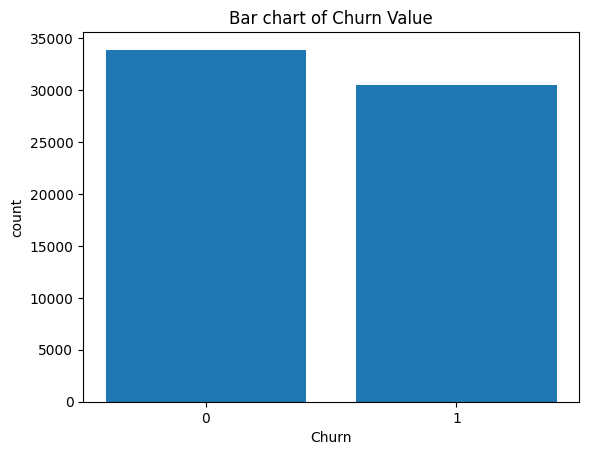

In [18]:
plt.bar(value_count.index,value_count.values)
plt.xlabel('Churn')
plt.ylabel('count')
plt.title('Bar chart of Churn Value')
plt.xticks([0,1])
plt.show()

In [19]:
dt.describe()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,0.466353,31.994827,15.080234,5.400690,17.133952,1.000792,0.991052,541.023379,15.498850,0.473685
std,18583.317451,13.924911,0.498870,17.098234,8.816470,3.114005,8.852211,0.816854,0.810036,260.874809,8.638436,0.499311
min,1.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,0.000000,18.000000,7.000000,3.000000,10.000000,0.000000,0.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,0.000000,33.000000,15.000000,6.000000,19.000000,1.000000,1.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,1.000000,47.000000,23.000000,8.000000,25.000000,2.000000,2.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,1.000000,60.000000,30.000000,10.000000,30.000000,2.000000,2.000000,1000.000000,30.000000,1.000000


In [20]:
dt.drop(['CustomerID', 'Tenure', 'Support Calls','Usage Frequency','Payment Delay'], axis=1, inplace=True)

In [21]:
dt.head(7)

,Age,Gender,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,0,1,598,9,1
1,41,0,2,1,584,20,0
2,47,1,1,0,757,21,0
3,35,1,1,2,232,18,0
4,53,0,2,0,533,18,0
5,30,1,1,1,500,29,0
6,47,0,0,2,574,14,1


In [22]:
label = dt['Churn']

In [23]:
label

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

In [24]:
dt

,Age,Gender,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,0,1,598,9,1
1,41,0,2,1,584,20,0
2,47,1,1,0,757,21,0
3,35,1,1,2,232,18,0
4,53,0,2,0,533,18,0
...,...,...,...,...,...,...,...
64369,45,0,0,2,947,14,1
64370,37,1,2,0,923,9,1
64371,25,1,1,1,327,20,1
64372,50,0,2,1,540,13,1


In [25]:
dt.drop(['Churn'], axis=1)

,Age,Gender,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0,0,1,598,9
1,41,0,2,1,584,20
2,47,1,1,0,757,21
3,35,1,1,2,232,18
4,53,0,2,0,533,18
...,...,...,...,...,...,...
64369,45,0,0,2,947,14
64370,37,1,2,0,923,9
64371,25,1,1,1,327,20
64372,50,0,2,1,540,13


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn import metrics

In [27]:
len(dt)

64374

In [28]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [29]:
len(x_train), len(x_test)

(51499, 12875)

In [30]:
print(y_train.shape)

(51499,)


In [31]:
0.2*64374

12874.800000000001

In [32]:
model = LogisticRegression()

In [33]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
predicted = model.predict(x_test)

In [35]:
accuracy_score(predicted, y_test)

1.0

In [36]:
f1 = metrics.f1_score(y_test, predicted)
f1

1.0

In [37]:
precision = precision_score(y_test, predicted)
precision

1.0

In [38]:
print(x_train.columns)


Index(['Age', 'Gender', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')


In [39]:
print(x_train.head())

       Age  Gender  Subscription Type  Contract Length  Total Spend  \
50374   33       0                  2                2          896   
3304    31       1                  2                1          130   
48035   60       0                  1                2          153   
31008   51       0                  0                1          880   
3544    46       1                  1                0          469   

       Last Interaction  Churn  
50374                18      1  
3304                 21      0  
48035                28      1  
31008                 6      1  
3544                 28      0  


In [40]:
print("Number of features: ", len(x_train.columns))

Number of features:  7


In [41]:
test_data.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [43]:
test_data.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [44]:
test_data.drop(['CustomerID','Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay'], axis=1, inplace=True )

In [45]:
print(test_data.shape)

(64374, 7)


In [46]:
X_test = test_data

In [47]:
y_test = test_data['Churn']

In [48]:
test_data.head(5)

,Age,Gender,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,Basic,Monthly,598,9,1
1,41,Female,Standard,Monthly,584,20,0
2,47,Male,Premium,Annual,757,21,0
3,35,Male,Premium,Quarterly,232,18,0
4,53,Female,Standard,Annual,533,18,0


In [49]:
test_data['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

In [50]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  int64 
 2   Subscription Type  64374 non-null  object
 3   Contract Length    64374 non-null  object
 4   Total Spend        64374 non-null  int64 
 5   Last Interaction   64374 non-null  int64 
 6   Churn              64374 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ MB


In [51]:
test_data['Subscription Type'] =  label_encoder.fit_transform(test_data['Subscription Type'])

In [52]:
test_data['Contract Length'] = label_encoder.fit_transform(test_data['Contract Length'])

In [53]:
y_pred = model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)

In [55]:
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 100.00%


In [56]:
from sklearn.metrics import log_loss

In [57]:
model = {
    'Logistic Regression': LogisticRegression(max_iter=200)
}

In [58]:
for name, model in model.items():
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    loss = log_loss(y_test, y_pred_proba)
    print(f'{name} Log Loss: {loss:.4f}')

Logistic Regression Log Loss: 0.0006


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn import metrics

In [60]:
len(dt)

64374

In [61]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [62]:
model = GaussianNB()

In [63]:
model.fit(x_train, y_train)

GaussianNB()

In [64]:
predictions = model.predict(x_test)

In [65]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [66]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [67]:
f1 = metrics.f1_score(y_test, predictions)
f1

1.0

In [68]:
precision = precision_score(y_test, predictions)
precision

1.0

In [69]:
from sklearn.metrics import log_loss

In [70]:
  models = {
      'Naive Bayes': GaussianNB()
  }

In [71]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)
    loss = log_loss(y_test, y_pred_proba)
    print(f'{name} Log Loss: {loss:.4f}')

Naive Bayes Log Loss: 0.0000


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn import metrics

In [73]:
len(dt)

64374

In [74]:
len(x_train), len(x_test)

(51499, 12875)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [76]:
model = SVC(kernel='linear',C=1.0, random_state=42)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [77]:
model_prediction = model.predict(x_test)

In [78]:
model_prediction

array([1, 1, 0, ..., 0, 1, 1])

In [79]:
len(model_prediction)

12875

In [80]:
y_test

49081    1
59398    1
1780     0
32386    1
33350    0
        ..
42530    1
36105    1
26620    0
2879     1
38606    1
Name: Churn, Length: 12875, dtype: int64

In [81]:
accuracy = accuracy_score(y_test, model_prediction)
print(f'The accuracy of the model is {accuracy*100}%')

The accuracy of the model is 100.0%


In [82]:
f1 = metrics.f1_score(y_test, model_prediction)
f1

1.0

In [83]:
precision = precision_score(y_test, model_prediction)
precision

1.0

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [85]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [86]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [87]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
predicts = random_forest.predict(x_test)

In [89]:
accuracy = accuracy_score(y_test, predicts)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [90]:
train_predictions = model.predict(x_train)

In [91]:
train_accuracy = accuracy_score(y_train, train_predictions)

print(f"Model accuracy on train data: {train_accuracy * 100:.2f}%")

Model accuracy on train data: 100.00%


In [92]:
from sklearn.metrics import log_loss

In [93]:
models = {
                'Random Forest': RandomForestClassifier()
            }

In [94]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)
    loss = log_loss(y_test, y_pred_proba)
    print(f'{name} Log Loss: {loss:.4f}')

Random Forest Log Loss: 0.0023


In [95]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [97]:
classifier = DecisionTreeClassifier()

In [98]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [99]:
y_pred = classifier.predict(x_test)

In [100]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [101]:
f1 = metrics.f1_score(y_test, y_pred)
f1

1.0

In [102]:
precision = precision_score(y_test, y_pred)
precision

1.0

In [103]:
from sklearn.metrics import log_loss

In [104]:
models = {
          'Decision Tree': DecisionTreeClassifier()
           }

In [105]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)
    loss = log_loss(y_test, y_pred_proba)
    print(f'{name} Log Loss: {loss:.4f}')

Decision Tree Log Loss: 0.0000
